In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats 
import itertools

Truth values of all of the messages in the three words:

In [2]:
all_ = {'w_all': 1, 'w_some': 0, 'w_no': 0}
some_ = {'w_all': 1, 'w_some': 1, 'w_no': 0}
no_ = {'w_all': 0, 'w_some': 0, 'w_no': 1}
notall_ = {'w_all': 0, 'w_some': 1, 'w_no': 1}

In [3]:
messages = {'all': all_, 'some': some_, 'no': no_, 'notall': notall_}

Probability of each message:

In [4]:
prob_message = {'all': 1/3, 'some': 2/3, 'no': 1/3, 'notall': 2/3}

In [5]:
def P(p_0, world, n):
    if world == 'w_all':
        return (p_0 ** n)
    elif world == 'w_no':
        return ((1 - p_0)**n)
    else:
        return (1 - (p_0 ** n + (1 - p_0)**n))

In [6]:
def P_0(p_0, world, message, n):
    if messages.get(message).get(world) == 1:
        return P(p_0, world, n)/prob_message.get(message)
    else:
        # othervise return 0
        return 0

Utility for each message is computed as follows:

$$log(P_0(w|message)) - cost(m)$$

In [7]:
def utility(message_c, message, world, p_0, n):
    return np.log(P_0(p_0, world, message, n)) - message_c.get(message)

Return the best message given the world:

In [8]:
def m(p_0, w, n, message_c):
    dic_res = {}
    for element in message_c.keys():
        dic_res[element] = utility(message_c=message_c, message=element, world=w, p_0=p_0, n=n)
    winner = max(dic_res, key=dic_res.get)
    return dic_res.get(winner)

The function below computes the following equation given the parameters for the Beta distribution representing the priors:

$$\sum_{P_0} P(P_0) \times (\sum_{w} P(w) \times U(m(P_0,M,w), w, P_0))$$

In [20]:
@np.vectorize
def expected_U(a, b, message_c, n=50):
    res = []
    for i in np.arange(0.01, 1, 0.01):
        utility = []
        for world in ['w_all', 'w_all', 'w_some']:
            utility.append(m(i, world, n, message_c) * P(i, world, n))
        res.append(scipy.stats.beta(a, b).pdf(i)*sum(utility))
    return(sum(res))

In [21]:
X = np.arange(0.01, 3, 0.1)
Y = np.arange(0.01, 3, 0.1)
X, Y = np.meshgrid(X, Y)

Let's fix the number of elements at 10, 50 and 100:

In [23]:
Z_10 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=10)
Z_50 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=50)
Z_100 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=100)

<ipython-input-7-b267681f483b>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0(p_0, world, message, n)) - message_c.get(message)


In [37]:
def plot_U(X, Y, Z):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='binary', edgecolor='none', alpha=0.5)
    ax.grid(False)
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')
    ax.set_zlabel('Expected utility')

Expected utility plots for the 10, 50 and 100 number of items, respectively:

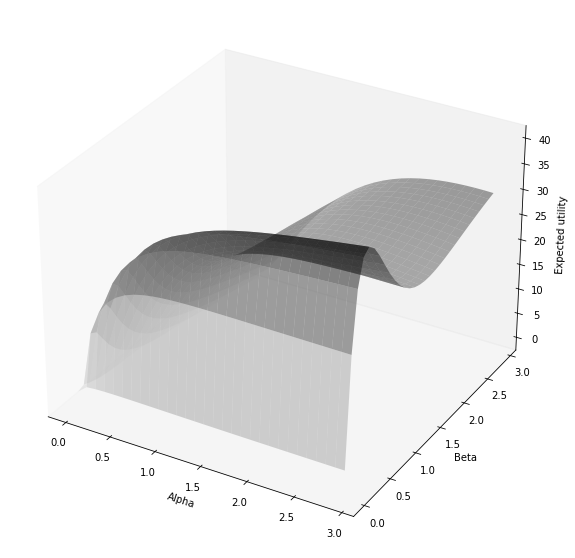

In [38]:
plot_U(X, Y, Z_10)

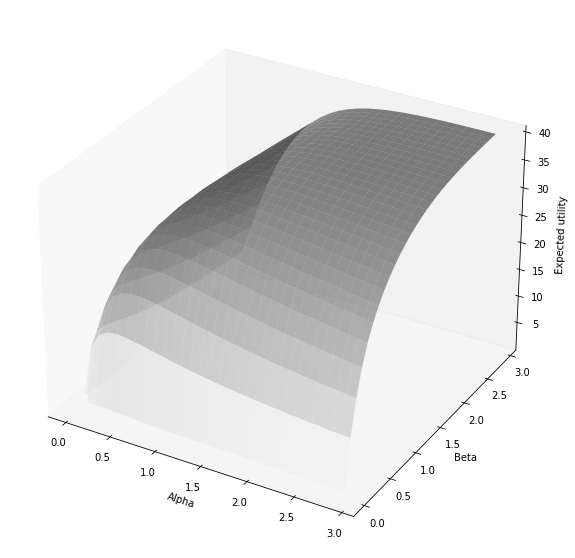

In [39]:
plot_U(X, Y, Z_50)

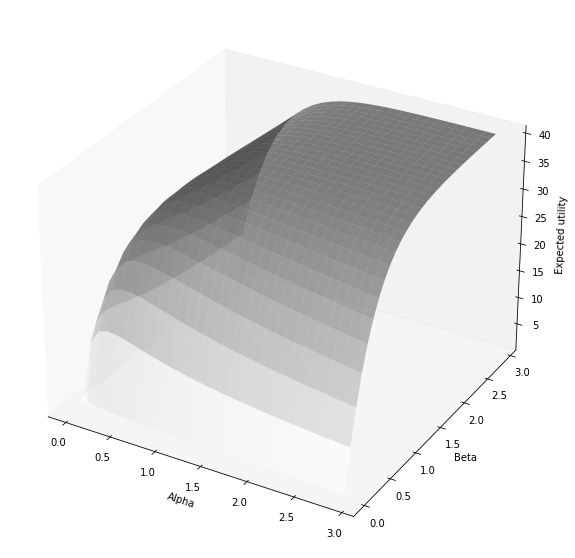

In [40]:
plot_U(X, Y, Z_100)

Absolute difference in-between 100 and 10 items model:

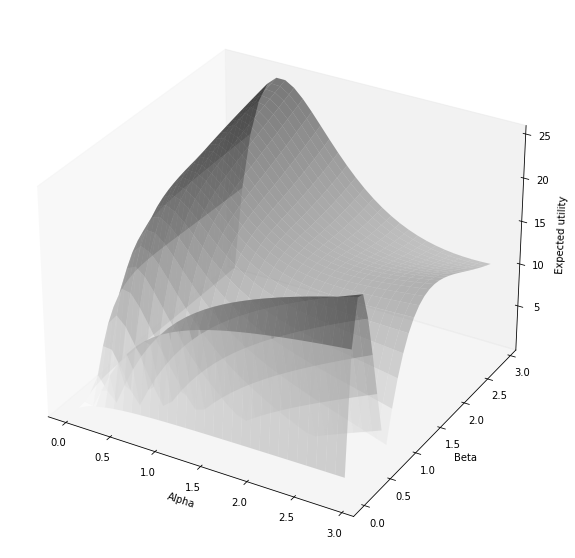

In [41]:
plot_U(X, Y, abs(Z_100-Z_10))